# Making Transformer From Scratch Using PyTorch

"*Large Language Models(LLM) have taken ~the NLP community~ ~AI community~ **the Whole World** by storm*"

And the elementary building block of large language models (the GPT ones) is the transformer. Therefore, in this project, I would like to focus on trying to understand how this architecture works and trying to create it from scratch.

Of course, due to some computational limitations, I have to limit myself to a relatively small database and architecture.

## Theoretical Background

I am very interested in understanding the workflow of this architecture, and therefore I would like to simultaneously have a solid understanding of the theoretical basis of its operation at the same time without forgetting that still the transformer remains a tool of my work and there is a certain limit to its knowledge, which is not necessary to cross.

There are several sources that I intend to use:

1. The publication that first described the transformer architecture: [Attention is All You Need](https://arxiv.org/abs/1706.03762) and the following important publications in the subject (most are listed in the repository from point 2)
2. A [repository on GitHub](https://github.com/Hannibal046/Awesome-LLM?tab=readme-ov-file) that is a treasure trove of knowledge on the subject of LLM
3. [Repository on GitHub](https://github.com/mlabonne/llm-course) being a course to LLM
4. A very [helpful website](https://bbycroft.net/llm?utm_source=tldrai) in the whole learning process showing the operation of the Transformer interactively
5. Countless articles (also videos) scattered in various corners of the Internet (mainly [this excellent tutorial](https://www.youtube.com/watch?v=kCc8FmEb1nY)]
6. [Endless conversations with ChatGPT](https://chat.openai.com/share/d52324ae-7813-49fc-bd0a-e2bae5cad81c)

## Preparing Database

In [ ]:
#everyone who wants to perform transformer training on a small dataset uses the so-called tiny-shakespeare database for this purpose. I do not intend to be an exception in this topic

#downloading the file
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-27 18:00:44--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.2’

input.txt.2         100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2024-01-27 18:00:45 (38.1 MB/s) - ‘input.txt.2’ saved [1115394/1115394]



In [ ]:
#let's look at our data
with open('input.txt') as f:
    text = f.read()
print('Length of input.txt (characters):',len(text))
print('Number of words:',len(text.split()))
print('First 300 characters:',text[:300])

Length of input.txt (characters): 1115394
Number of words: 202651
First 300 characters: First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


Thus, we have a database of more than 200,000 words. The first step in any machine learning process is proper data preparation. In our case, it will be necessary to use a process called tokenization, which is the division of the entire database into shorter fragments (tokens). A common strategy here is to use tokens based on sub-word sequences (for example OpenAI has [tiktoken](https://github.com/openai/tiktoken) repository, which has about 50,000 tokens in the dictionary.)

In [ ]:
words = set(text.split())
print('All word-based tokens:',len(words))
words = set(text.lower().split())
print('Ignore case-sensitivity:',len(words))

All word-based tokens: 25670
Ignore case-sensitivity: 23641


In our situation, single-character tokenization will be necessary, although I will try to return to this topic and see what effect different tokenization approaches have on the final result of training. Also, neural networks are not capable of analyzing data other than numeric, it is necessary to change the representation of our tokens to numeric.

In [ ]:
tokens = set(list(text))
tokens

#convert different characters into numerical representation
char_to_token = {char:idx for idx,char in enumerate(tokens)}
token_to_char = {idx:char for char,idx in char_to_token.items()}
encode = lambda x: [char_to_token[char] for char in x]
decode = lambda idxs: ''.join([token_to_char[idx] for idx in idxs])
print('Character to index:',char_to_token)
print('Index to character:,',token_to_char)
print('Tokenization of `Hello World!`:',encode('Hello World!'))
print('Decoding :', decode(encode('Hello World!')))

Character to index: {'x': 0, 'F': 1, 'Y': 2, 'G': 3, 't': 4, 'z': 5, 'l': 6, 'N': 7, 'P': 8, 's': 9, 'v': 10, "'": 11, 'I': 12, ' ': 13, '.': 14, 'y': 15, 'f': 16, 'u': 17, 'O': 18, 'r': 19, 'd': 20, 'H': 21, 'w': 22, 'h': 23, 'K': 24, '3': 25, 'L': 26, 'm': 27, 'R': 28, 'W': 29, 'j': 30, 'E': 31, 'M': 32, 'V': 33, 'q': 34, 'c': 35, 'o': 36, ':': 37, 'n': 38, ';': 39, 'e': 40, 'i': 41, '$': 42, 'D': 43, 'A': 44, 'J': 45, 'a': 46, 'p': 47, ',': 48, '-': 49, 'U': 50, '?': 51, 'Z': 52, 'X': 53, '!': 54, '&': 55, 'g': 56, 'T': 57, 'C': 58, 'S': 59, 'b': 60, '\n': 61, 'B': 62, 'k': 63, 'Q': 64}
Index to character:, {0: 'x', 1: 'F', 2: 'Y', 3: 'G', 4: 't', 5: 'z', 6: 'l', 7: 'N', 8: 'P', 9: 's', 10: 'v', 11: "'", 12: 'I', 13: ' ', 14: '.', 15: 'y', 16: 'f', 17: 'u', 18: 'O', 19: 'r', 20: 'd', 21: 'H', 22: 'w', 23: 'h', 24: 'K', 25: '3', 26: 'L', 27: 'm', 28: 'R', 29: 'W', 30: 'j', 31: 'E', 32: 'M', 33: 'V', 34: 'q', 35: 'c', 36: 'o', 37: ':', 38: 'n', 39: ';', 40: 'e', 41: 'i', 42: '$', 43: 

In [ ]:
#the next step will be tokenization of the entire dataset
import torch
encoded_text = torch.tensor(encode(text))
print('Encoded Text shape:',encoded_text.shape, 'Encoded Text Dtype:', encoded_text.dtype)
encoded_text

Encoded Text shape: torch.Size([1115394]) Encoded Text Dtype: torch.int64


tensor([ 1, 41, 19,  ..., 56, 14, 61])

In [ ]:
#now we need to split our database into train and test set using standard 90/10 ratio
train_test_split = 0.9
train_data = encoded_text[:int(train_test_split*len(encoded_text))]
valid_data = encoded_text[int(train_test_split*len(encoded_text)):]
print('Train data length:',len(train_data),'Valid data length:',len(valid_data))

Train data length: 1003854 Valid data length: 111540


Now we have to deal with the length of the context: if I understand correctly, the length of the context is the maximum length of the sequence that one time will be given to learning, it is also a frequently given parameter for various LLMs indicating how long queries can be directed to such models so that they do not lose the context. For example context lenght of ChatGPT 3.5 is 4,096 where context lenght of ChatGPT 4.0 exceed 32 thousands.

## Data Loader (use of T4 or other GPU is strongly recommended from this point)

### Hyperparameter board

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import time

BATCH_SIZE = 4 #number of token chunks per batch
CONTEXT_LEN = 8 #length of the token chunks
LEARNING_RATE = 1e-2
MAX_ITERS = 2000 #number of training iterations or steps
EVAL_INTERVAL = 300 #number of steps between evaluating the validation set to see how our validation loss is doing.
EVAL_ITERS = 250 #number of steps to do on the validation set per each interval. We do more than 1 to get a more accurate overall valid loss
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDING_DIM = 32 #the vector size of the token embeddings
VOCAB_SIZE = len(tokens) #self-explanatory
TORCH_SEED = 42 #to preserve simillar results
BLOCK_SIZE = 4 #we'll talk about it later
NUM_HEADS = 4 #we'll talk about it later
HEAD_SIZE = int(EMBEDDING_DIM/NUM_HEADS) #we'll talk about it later
N_LAYER = 6 #we'll talk about it later
DROPOUT = 0.2


In [ ]:
#function that generates a batch of data from the entire dataset
def get_batch(split:str, batch_size:int=BATCH_SIZE, context_length:int=CONTEXT_LEN):
    #determining whether to sample data from training or validation data
    data = train_data if split == 'train' else valid_data

    #index draw, its maximum value should still allow to generate a full batch (hence we subtract the length of the context)
    idxs = torch.randint(low=0, high=len(data)-CONTEXT_LEN, size=(BATCH_SIZE,))
    x = torch.stack([data[idx:idx+CONTEXT_LEN] for idx in idxs])
    y = torch.stack([data[idx+1:idx+CONTEXT_LEN+1] for idx in idxs])
    x,y = x.to(DEVICE), y.to(DEVICE) #send data to the GPU if available
    return x,y

#function to estimate loss based on the average value of the loss function for the training and validation set
@torch.no_grad()
def estimate_loss():
    out = {}
    #turn on evaluation mode
    model.eval()
    for split in ['train','valid']:
        losses = torch.zeros(EVAL_ITERS)
        for k in range(EVAL_ITERS):
            x_batch, y_batch = get_batch(split)
            logits, loss = model(x_batch, y_batch)
            losses[k] = loss.item()
        out[split] = losses.mean()
    #turn back to training mode
    model.train()
    return out

#example to show how tokenisation works
xb, yb = get_batch('train')
print('inputs:')
print('shape:',xb.shape)
print(xb)
print('targets:')
print('shape:',yb.shape)
print(yb,'\n-----------------------------------------------')
for batch_idx in range(BATCH_SIZE):
    for sequence_idx in range(CONTEXT_LEN):
        context = xb[batch_idx,:sequence_idx+1]
        target = yb[batch_idx,sequence_idx]
        print(f"Given input context ({context.tolist()}) the target is: {target}")



inputs:
shape: torch.Size([4, 8])
tensor([[13, 17,  9, 40, 13, 20, 40,  6],
        [40, 19, 39, 13,  9, 23, 40, 13],
        [41,  9, 13,  4, 23, 40, 13,  6],
        [61, 58, 36, 17,  6, 20, 13, 38]], device='cuda:0')
targets:
shape: torch.Size([4, 8])
tensor([[17,  9, 40, 13, 20, 40,  6, 46],
        [19, 39, 13,  9, 23, 40, 13, 41],
        [ 9, 13,  4, 23, 40, 13,  6, 41],
        [58, 36, 17,  6, 20, 13, 38, 36]], device='cuda:0') 
-----------------------------------------------
Given input context ([13]) the target is: 17
Given input context ([13, 17]) the target is: 9
Given input context ([13, 17, 9]) the target is: 40
Given input context ([13, 17, 9, 40]) the target is: 13
Given input context ([13, 17, 9, 40, 13]) the target is: 20
Given input context ([13, 17, 9, 40, 13, 20]) the target is: 40
Given input context ([13, 17, 9, 40, 13, 20, 40]) the target is: 6
Given input context ([13, 17, 9, 40, 13, 20, 40, 6]) the target is: 46
Given input context ([40]) the target is: 19
Gi

Here we see a very important methodology: we will train our model on a context of length *n*, which means that we will give it information of length *1*... *N*. And each time we will give the expected result: which is, the token occurring after the given sequence in the original dataset.

## Bigram Model

Before we start creating a more complex architecture like a transformer, I would first like to see how a very simple model handles the task. Let's build Bigram Model

In [ ]:
#it will based on what is the probability that a given token will be followed by another token

torch.manual_seed(TORCH_SEED)
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.vocab_size = VOCAB_SIZE
        #each token reads off the logits from the subsequent token from the lookup table
        #instead of representation of every token as exact one discrete number we use embedding which transforms the representation of each token into a vector of the specified length (in our case vocab_size)
        self.token_embedding_table = nn.Embedding(num_embeddings=self.vocab_size, embedding_dim=self.vocab_size)

    def forward(self, idx, targets=None):

        #B is number of batches
        #T is time or in more strict words is the number of tokens in batch
        #C is channel or in more strict words is the lenght of vectors that's represents each token
        #both idx and targets are (B,T) Batch x Time array of integers

        logits = self.token_embedding_table(idx) #(B,T,C)
        if targets is not None:
            B,T,C = logits.shape

            #we have to rearrange the dimensionality of logits due to formal requirements of cross entropy in pytorch
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    #function that generates a sequence of given lenght
    def generate(self, idx, max_new_tokens):
        #idx is (B,T) array of indicies in the current context
        for _ in range(max_new_tokens):
            #get predictions - calling `forward`
            logits, loss = self(idx)
            #get the last time step from logits where the dimensions of the logits are (B,T,C)
            logits_last_timestep = logits[:,-1,:] #becomes (B,C)
            #apply softmax to get probabilities
            probs = F.softmax(input=logits_last_timestep, dim=-1) #(B,C)
            #sample from the probs distribution.
            idx_next = torch.multinomial(input=probs, num_samples=1) #(B,1) Returns (B,idxs) where idxs are random integer indicies.
            #append the sampled indexes idx_next to idx
            idx = torch.cat((idx, idx_next), dim=1) #(B, T+1)
        return idx

model = BigramLanguageModel(vocab_size=VOCAB_SIZE)
model = model.to(DEVICE)
logits, loss = model(xb.to(DEVICE),yb.to(DEVICE))
print('Loss:',loss)
idx=torch.zeros((1,1), dtype=torch.long).to(DEVICE)
print('Generated Token:')
print(decode(model.generate(idx,max_new_tokens=100)[0].tolist()))

Loss: tensor(4.4107, device='cuda:0', grad_fn=<NllLossBackward0>)
Generated Token:
xwxsSFv:sjwCeQfRzqOM
RrCzS:sVc$ojsKZ&MyVlo!CBir:lSma,nRH?ouRN3 ENBh!r!m
pTye3H'HMsTf&gJnR!Ce TCRwPcrH


The output of this is totally garbage because the model is not trained.  Next we'll get set up to train the model.

In [ ]:
#some basic training using AdamW optimizer and 10000 steps
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)

BATCH_SIZE = 32
CONTEXT_LEN = 8

for steps in range(10000):
    #sample a batch of data
    xb, yb = get_batch('train')

    #evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if steps%1000 == 0: print('Loss:',round(loss.item(),3), end=' ')

#creating output
context = torch.zeros((1,1), dtype=torch.long, device=DEVICE) #this is an initial token for generating a sequence by out model, token 0 is /n in our case
print()
print(decode(model.generate(context,max_new_tokens=300)[0].tolist())) #generating answer by model

Loss: 4.494 Loss: 2.568 Loss: 2.359 Loss: 2.446 Loss: 2.556 Loss: 2.49 Loss: 2.429 Loss: 2.421 Loss: 2.487 Loss: 2.447 
xine sple d be towitore ilu spr, ak etarat s he d tolen,
ORDUCoule?
Was's d y p, alangoulpavestugapis herettig tsllaken, bemis wnd come izerin far anthiverinof.

K:
NCARORothimand ormy ude, my' boigre; try tr ferthanglle spame s!'sh fan,
Wh thath at hind thyend se mew'shatth ces.
Drees ghe,
I cen tho


Loss value decreased from 4.5 to ~2.4 and as we can see,  the results are not thrilling, but training gives visible results

## Preparing for Building Transformer

The bigram model is a veeeery simple model that actually predicts the next token based solely on the last preceding token. This is the moment when the transformer enters the game. But before that, we need to understand a certain thing that will drastically reduce the training time of the transformer

### A Brief History of Matrix Multiplication

Because of the parallelization of calculations when performing them on arrays, matrix multiplication is a much more preferred way of conducting operations than by simply nesting a for loop. However, this is not a trivial task.

The main idea of the attention mechanism, which made the transformer essentially a breakthrough architecture, is the principle that "token can not predict the future" which means that token *n*, can only "look" at tokens *1 ... n*, but cannot "know" what are the values of tokens *n+1 ... N*

This is not the only way to use a transformer, and for architectures that are not aimed at predicting the next word in a sequence, such attention mechanisms can be used that are not "lower triangle matrix" but that is another story

Let's look at an example on a random matrix

In [ ]:
B,T,C = 4,6,1
x = torch.randn((B,T,C))
x.shape

torch.Size([4, 6, 1])

In [ ]:
x_bag_of_words = torch.zeros((B,T,C))

for batch_idx in range(B):
    for token_idx in range(T):
        x_previous = x[batch_idx,:token_idx+1] # (T,C)
        x_bag_of_words[batch_idx,token_idx] = torch.mean(x_previous, dim=0)


In [ ]:
x[0],x_bag_of_words[0]

(tensor([[ 0.2090],
         [-0.2196],
         [ 0.2391],
         [-0.6102],
         [-0.0205],
         [-0.2582]]),
 tensor([[ 0.2090],
         [-0.0053],
         [ 0.0762],
         [-0.0954],
         [-0.0804],
         [-0.1100]]))

As we can see, the first element of *x_bag_of_words* are the same as the first element of *x*, however second element of *x_bag_of_words* is the average of first and second element of *x*, third element of *x_bag_of_words* is the sum of first, second and third element of *x* and so on.. this is what we want to get to proceed the attention mechanism. However there are much better way to do this calculation using some trick

In [ ]:
#we can create special downtriangular matrix
torch.tril(torch.ones(3,3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [ ]:
#and when we use this matrix to our purpose

mask = torch.tril(torch.ones((1,T,T),dtype=torch.float))
mask = mask / mask.sum(dim=2,keepdim=True)
a = mask
b = x
c = a @ b


In [ ]:
print(torch.allclose(x_bag_of_words, c))
c[0], x_bag_of_words[0]

True


(tensor([[ 0.2090],
         [-0.0053],
         [ 0.0762],
         [-0.0954],
         [-0.0804],
         [-0.1100]]),
 tensor([[ 0.2090],
         [-0.0053],
         [ 0.0762],
         [-0.0954],
         [-0.0804],
         [-0.1100]]))

We have to go even further, and we need to use softmax to operate with this matrix

In [ ]:
mask2 = torch.zeros_like(mask).masked_fill(mask==0,float('-inf'))
mask2

tensor([[[0., -inf, -inf, -inf, -inf, -inf],
         [0., 0., -inf, -inf, -inf, -inf],
         [0., 0., 0., -inf, -inf, -inf],
         [0., 0., 0., 0., -inf, -inf],
         [0., 0., 0., 0., 0., -inf],
         [0., 0., 0., 0., 0., 0.]]])

In [ ]:
mask2 =  F.softmax(mask2,dim=2)
mask2

tensor([[[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000],
         [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000],
         [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]]])

Basically, mask2 and mask are exactly the same

In [ ]:
torch.allclose(mask,mask2)

True

So what is the difference? Very nuanced. The trick is to use -inf instead of zeros: this makes us **mask** tokens "from the future", and also thanks to using softmax we are able to moderate weights of tokens in different context (I'll talk about it later). Ok, we just showed that by multiplying matrices you can achieve exactly the same effect as the previous loop in a loop. What kind of time savings does this entail?

In [ ]:
B,T,C = 256, 512, 64 #let's increase the size of our matrix
x = torch.randn((B,T,C))
x.shape
x_bag_of_words = torch.zeros((B,T,C))

In [ ]:
%%timeit -n 2 -r 2
for batch_idx in range(B):
    for token_idx in range(T):
        x_previous = x[batch_idx,:token_idx+1] # (T,C)
        x_bag_of_words[batch_idx,token_idx] = torch.mean(x_previous, dim=0)

3.8 s ± 368 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [ ]:
mask = torch.tril(torch.ones((1,T,T),dtype=torch.float))
mask = mask / mask.sum(dim=2,keepdim=True)
mask2 = torch.zeros_like(mask).masked_fill(mask==0,float('-inf'))
mask2 =  F.softmax(mask2,dim=2)

a = mask2
b = x

In [ ]:
%%timeit -n 2 -r 2
c = a @ b

214 ms ± 934 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)


Extreme time savings with one (almost) simple change!

## Building Transformer

### Step 1: Transformer without Self Attention Module

The first step in building a transformer will be to rebuild the architecture into one that is more suited to our needs. The differences between the *BigramLanguageModel* class and the *TransformerLanguageModel* class are just a little tidying up of global variables (we don't have to define, for example, *vocab_size* when it is a global variable) and the addition of an intermediate step in the creation of logits. Now we create a table with dimensions (*vocab_size x embedding_dim* instead of *vocab_size x vocab_size*) which requires an additional conversion step for this table (*language_model_head_linear_layer*) and then use this linear layer to create logits. If I understand correctly, this step will allow one dimension of the embedding table to become independent of apriori imposed model properties and then become another hyperparameter that can be optimized

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM) #NEW
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE) #NEW

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx) #NEW
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE)) #NEW
        x = token_embeddings + pos_embedding #NEW the x does not contain only information about the value of the token, but also about its position which is in line with the assumptions of the transformer architecture
        logits = self.language_model_head_linear_layer(x) #UPDATE

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print()
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.4255) Validation Loss: tensor(4.4403)
Step: 250 Training Loss: tensor(2.5484) Validation Loss: tensor(2.5647)
Step: 500 Training Loss: tensor(2.5296) Validation Loss: tensor(2.5373)
Step: 750 Training Loss: tensor(2.5012) Validation Loss: tensor(2.5251)
Step: 1000 Training Loss: tensor(2.5074) Validation Loss: tensor(2.5326)
Step: 1250 Training Loss: tensor(2.5010) Validation Loss: tensor(2.5174)
Step: 1500 Training Loss: tensor(2.4944) Validation Loss: tensor(2.5247)
Step: 1750 Training Loss: tensor(2.4896) Validation Loss: tensor(2.5171)
Step: 1999 Training Loss: tensor(2.4888) Validation Loss: tensor(2.5069)

x
This?
ARDorabr K: lver, nf as; IMy, isi O: fo IINAnd co geldis al thiarcke. they eerowon rurnd, hariso I'l t tho LA ueie, t as HAy wam bifldek angee, my,
PERE:
Wiund VO:
Then wngs anghandet thend y i


According to the scheme from original paper, we have built part of Transformer that is on the draw. For now we didn't achieve much improvement comparing to the Bigram architecture.

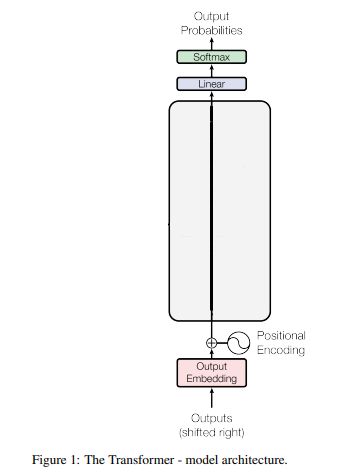

### Step 1.1: In the way of understanding self attention mechanism

Returning to the final step, which we reached when analyzing [matrix multiplication](https://colab.research.google.com/drive/1lPAkgGoHptwUBmmc8Ga0pvuCEo5VNENq?authuser=2#scrollTo=axcwR8wXUmYF&line=1&uniqifier=1)

In [ ]:
mask

tensor([[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3333, 0.3333, 0.3333,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0020, 0.0020, 0.0020,  ..., 0.0020, 0.0000, 0.0000],
         [0.0020, 0.0020, 0.0020,  ..., 0.0020, 0.0020, 0.0000],
         [0.0020, 0.0020, 0.0020,  ..., 0.0020, 0.0020, 0.0020]]])

This matrix represents one basic thing: no token in our model predicts the future: only tokens from *1... n* are affected by the *n-th* token, and this is what the mask tensor represents.

Note: in situations where such communication of tokens on an each-to-any basis is legitimate as much as possible it can be used, it is not in any way forbidden, restricted or worse, provided that our goal is to create an architecture where tokens communicate on just such a basis


But back to the typical transformer architecture: we want to create an attention mechanism based on key, query and value.

In [ ]:
B,T,C = BATCH_SIZE, CONTEXT_LEN, EMBEDDING_DIM
x = torch.randn((B,T,C))
print('Batch Size (B):',B,'Context Length (T):',T,'Embedding Dimension (C):',C)

#learned vector to extract key vector from token embedding vector
key_layer = nn.Linear(in_features=C, out_features=HEAD_SIZE, bias=False)

#learned vector to extract query vector from token embedding vector
query_layer = nn.Linear(in_features=C, out_features=HEAD_SIZE, bias=False)

#learned vector to extract value vector from token embedding vector
value_layer = nn.Linear(in_features=C, out_features=HEAD_SIZE, bias=False) #NEW

#extract query and key values for every token in the batch in parallel
key = key_layer(x) # (B,T,head_size)
query = query_layer(x) # (B,T,head_size)
value = value_layer(x)

weights = query @ key.transpose(-2, -1)
weights[0]

Batch Size (B): 32 Context Length (T): 8 Embedding Dimension (C): 32


tensor([[ 0.7382,  1.8175,  0.1999,  0.1742,  1.0474, -1.5874, -0.6308,  0.7220],
        [ 2.5874, -2.2420, -0.3886, -0.9581, -1.3021,  0.3683, -0.4985, -1.7426],
        [-1.6801,  0.0347, -0.0189,  0.6754,  0.6403, -0.3879,  0.7850,  0.2902],
        [-1.6953,  1.5849, -0.0159,  0.6896,  1.1454,  0.1632,  0.5064,  1.3902],
        [ 0.8106, -1.1090, -0.1804,  0.1267, -0.8548,  0.8957,  0.1704, -0.0104],
        [-0.1280,  0.4948, -0.3047,  0.2876,  0.3638, -0.5413,  0.2235,  0.0090],
        [ 0.3005, -0.3297, -0.4814, -0.3137, -1.7938,  1.5146,  0.2502, -0.0567],
        [ 0.9452,  1.2642,  0.3158, -0.3075,  1.2759, -1.4599, -0.8722,  0.2749]],
       grad_fn=<SelectBackward0>)

From now we need to take a few extra steps to reproduce the idea from the paper

In [ ]:
tril = torch.tril(torch.ones(T,T,dtype=torch.long))

weights = weights.masked_fill(tril == 0, float('-inf')) #masks future tokens
weights = torch.softmax(weights, dim=-1) #provides even distribution (weights that add up to 1)
weights[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9921, 0.0079, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0846, 0.4700, 0.4454, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0228, 0.6069, 0.1224, 0.2479, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4522, 0.0663, 0.1678, 0.2282, 0.0855, 0.0000, 0.0000, 0.0000],
        [0.1331, 0.2481, 0.1115, 0.2017, 0.2176, 0.0880, 0.0000, 0.0000],
        [0.1434, 0.0764, 0.0656, 0.0776, 0.0177, 0.4829, 0.1364, 0.0000],
        [0.1869, 0.2571, 0.0996, 0.0534, 0.2601, 0.0169, 0.0304, 0.0956]],
       grad_fn=<SelectBackward0>)

We have achieved a very important thing at this point: the values in each row are no longer equal (this is due to the fact that the array of weights contains different values before sofmax). This means that the weight array will be able to adjust during training

In [ ]:
out = (query @ key.transpose(-2, -1)) @ value * HEAD_SIZE**-0.5 #NEW (B, T, T) @ (B, T, head_size) = (B, T, head_size)
out[0]
out.shape

torch.Size([32, 8, 8])

Basically it is a direct application of formula
which we can found in *Attention Is All You Need* paper:

$$Attention(key,query,value) = softmax\Big(\frac{query*key^T}{sqrt(head\_size)}*value\Big)$$

We have just built all the logic that we will use to build the attention mechanism.

We can think of these values as follows:

query - information about what the token is looking for

key - information about what a given token contains

x - private information available from the perspective of the token

value - information that the token will pass on if, based on the result of dot product of query and key, another token finds the token interesting

### Step 2: Building Single Head of Self Attention Mechanism

In [ ]:
class Head(nn.Module):
    """ single head of self attention """
    def __init__(self):
        super().__init__()
        self.key_layer   = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.query_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.value_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)

        self.register_buffer('tril', torch.tril(torch.ones((CONTEXT_LEN, CONTEXT_LEN))))

    #basically exactly the same steps as we did in Step 1.1
    def forward(self, x):
        B,T,C = x.shape
        q = self.query_layer(x)
        k = self.key_layer(x)
        v = self.value_layer(x)

        #compute scores based on affinities
        weights = (q @ k.transpose(-2,-1)) * HEAD_SIZE**-0.5 # (B,T,C) @ (B,C,T) -> (B,T,T)
        weights = weights.masked_fill(self.tril[:T,:T] == 0, float('-inf'))
        weights = F.softmax(input=weights, dim=-1)


        out = weights @ v # (B,T,T) @ (B,T,C) -> (B,T,C)
        return out

### Step 3: Transfomer with Single Head Self Attention Module

having ready implementation of attention, we can add it to our model

In [ ]:
LEARNING_RATE = 1e-3 #decreate the learning rate because self attention cannot tolerate very high learning rates.

class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.self_attention_head_linear_layer = Head() #NEW, adding a Single-Head Attention
        self.language_model_head_linear_layer = nn.Linear(HEAD_SIZE, VOCAB_SIZE) #for now we have to use such dimensions of the linear layer, in the future we'll adjust that

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.self_attention_head_linear_layer(x) #apply one head of self attention
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.2024) Validation Loss: tensor(4.2038)
Step: 250 Training Loss: tensor(3.1602) Validation Loss: tensor(3.1831)
Step: 500 Training Loss: tensor(2.9669) Validation Loss: tensor(2.9597)
Step: 750 Training Loss: tensor(2.7839) Validation Loss: tensor(2.7950)
Step: 1000 Training Loss: tensor(2.6868) Validation Loss: tensor(2.6759)
Step: 1250 Training Loss: tensor(2.6076) Validation Loss: tensor(2.6169)
Step: 1500 Training Loss: tensor(2.5630) Validation Loss: tensor(2.5730)
Step: 1750 Training Loss: tensor(2.5355) Validation Loss: tensor(2.5379)
Step: 1999 Training Loss: tensor(2.5257) Validation Loss: tensor(2.5351)
xd to thed, soutilane?

I t'an I
Be G
Pdndes,
Cout winor y ble llril kongil co:
Ae ig um.

O?
LA'is outo aue fo agr tond, ghe dteisalr ncic'otror,
ONENAINUEI wends
To;
Ales youprs ther to sorure th tre


Slight reduction in loss function

### Step 4: Transformer with Multi-Head Self Attention

Multi-head Self Attention is simply to perform exactly the same as single-head attention multiple times simultaneously and concatenating the results from each head

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head() for _ in range(NUM_HEADS)])

    def forward(self, x):
        return torch.cat([h(x) for h in self.heads], dim=-1) #note the concat is in the last 'C' dimension => (B,T,C*num_heads)

class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.self_attention_head_linear_layer = MultiHeadAttention() #UPDATED
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE) #UPDATED

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.self_attention_head_linear_layer(x)
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print()
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.1969) Validation Loss: tensor(4.1978)
Step: 250 Training Loss: tensor(2.8854) Validation Loss: tensor(2.9030)
Step: 500 Training Loss: tensor(2.6600) Validation Loss: tensor(2.6667)
Step: 750 Training Loss: tensor(2.5571) Validation Loss: tensor(2.5467)
Step: 1000 Training Loss: tensor(2.4851) Validation Loss: tensor(2.4985)
Step: 1250 Training Loss: tensor(2.4516) Validation Loss: tensor(2.4681)
Step: 1500 Training Loss: tensor(2.4206) Validation Loss: tensor(2.4129)
Step: 1750 Training Loss: tensor(2.3656) Validation Loss: tensor(2.3929)
Step: 1999 Training Loss: tensor(2.3710) Validation Loss: tensor(2.3778)

xdorl theil theis:
I;
E Gham DgROs pyou ave kevid bille fothend halitir ads ert art
Thy hereran ko lis tind inde Remn last youem to im athory has
IY hid ey onto he thor thoowhe mromy yo lig so vootir y


According to the scheme from original paper, we have built part of Transformer that is on the draw.

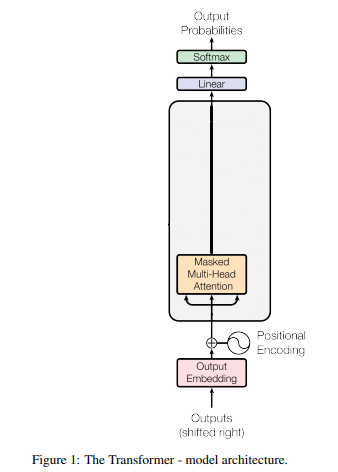

### Step 5: Feed Forward Network

In [ ]:
class FeedForwardNetwork(nn.Module):
    """A simple linear network followed by a non-linearity"""
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(in_features=EMBEDDING_DIM, out_features=EMBEDDING_DIM),
            nn.ReLU()
        )
    def forward(self, x):
        return self.ffn(x)

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.self_attention_head_linear_layer = MultiHeadAttention()
        self.feed_forward = FeedForwardNetwork(EMBEDDING_DIM) #NEW
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.self_attention_head_linear_layer(x)
        x = self.feed_forward(x) #NEW
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print()
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.1819) Validation Loss: tensor(4.1808)
Step: 250 Training Loss: tensor(2.9094) Validation Loss: tensor(2.9151)
Step: 500 Training Loss: tensor(2.6232) Validation Loss: tensor(2.6331)
Step: 750 Training Loss: tensor(2.5167) Validation Loss: tensor(2.5312)
Step: 1000 Training Loss: tensor(2.4674) Validation Loss: tensor(2.4712)
Step: 1250 Training Loss: tensor(2.4234) Validation Loss: tensor(2.4310)
Step: 1500 Training Loss: tensor(2.3926) Validation Loss: tensor(2.3932)
Step: 1750 Training Loss: tensor(2.3603) Validation Loss: tensor(2.3753)
Step: 1999 Training Loss: tensor(2.3460) Validation Loss: tensor(2.3559)

xnd, ows bever on stt,
It rostood wep of ourowe aiss!
Not ISOOImow: arowprod, is hath!

Be thisbrs. Sow por fr:
Min oun falvew: ispe thy doul.

Shy wat ing anld aly: sins war, bone cuelch mughe hausy q


No major changes in the value of the loss function (from ~2.4 to ~2.35). According to the scheme from original paper, we have built part of Transformer that is on the draw.

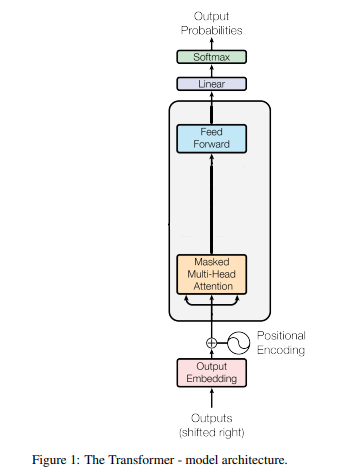

### Step 6: Block module

In [ ]:
class Block(nn.Module):
    """Transformer Block: Communication folled by computation."""
    def __init__(self):
        super().__init__()

        self.multi_self_attention_heads_layer = MultiHeadAttention()
        self.feed_forward_network = FeedForwardNetwork(EMBEDDING_DIM)

    def forward(self, x):
        x = self.multi_self_attention_heads_layer(x)
        x = self.feed_forward_network(x)
        return x

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        #NEW
        self.blocks = nn.Sequential(
            Block(),
            Block(),
            Block()
        )

        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.blocks(x) #UPDATED
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.1506) Validation Loss: tensor(4.1519)
Step: 250 Training Loss: tensor(3.2210) Validation Loss: tensor(3.2423)
Step: 500 Training Loss: tensor(2.9510) Validation Loss: tensor(2.9456)
Step: 750 Training Loss: tensor(2.8255) Validation Loss: tensor(2.8302)
Step: 1000 Training Loss: tensor(2.7508) Validation Loss: tensor(2.7413)
Step: 1250 Training Loss: tensor(2.6475) Validation Loss: tensor(2.6459)
Step: 1500 Training Loss: tensor(2.6069) Validation Loss: tensor(2.6060)
Step: 1750 Training Loss: tensor(2.5646) Validation Loss: tensor(2.5609)
Step: 1999 Training Loss: tensor(2.5263) Validation Loss: tensor(2.5294)
xe o paons enf mor'r naw-p thee
Nys,
Fhe hed tor lathor I
To: fhic, She bheay ler?
Ond: hal thy lith havde
Nlroulnd
Vrset funko tolr to Ieoaddten she maf mans
The-sd ruon;
Mn tean-et yit' che masl wo d


According to the scheme from original paper, we have built part of Transformer that is on the draw.

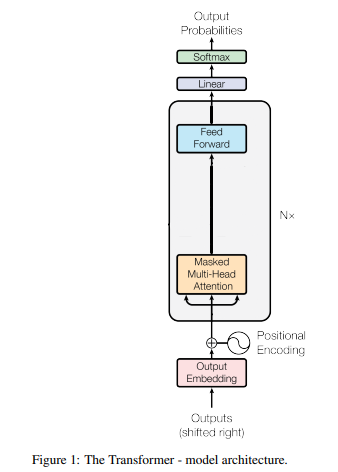

As you can see, our model started doing worse (based on the loss function) and this is due to the fact that the use of blocks makes the neural network very very very very complicated, which makes it difficult to optimize the whole system. We will now apply techniques that aim to improve this situation

### Step 7.1: Skip Connections (Residual Connections)

In [ ]:
class Block(nn.Module):
    """Transformer Block: Communication folled by computation."""
    def __init__(self):
        super().__init__()

        self.multi_self_attention_heads_layer = MultiHeadAttention()
        self.feed_forward_network = FeedForwardNetwork(EMBEDDING_DIM)

    def forward(self, x):
        x = x + self.multi_self_attention_heads_layer(x) #UPDATED
        x = x + self.feed_forward_network(x) #UPDATED
        return x

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head() for _ in range(NUM_HEADS)])
        self.projections = nn.Linear(EMBEDDING_DIM, EMBEDDING_DIM) #NEW

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1) #UPDATED
        return self.projections(out) #NEW


In [ ]:
class FeedForwardNetwork(nn.Module):
    """A simple linear network followed by a non-linearity"""
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(in_features=EMBEDDING_DIM, out_features=EMBEDDING_DIM*4), #UPDATED
            nn.ReLU(),
            nn.Linear(4*EMBEDDING_DIM, EMBEDDING_DIM) #NEW aka projections layer
        )
    def forward(self, x):
        return self.ffn(x)

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.blocks = nn.Sequential(
            Block(),
            Block(),
            Block()
        )

        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.blocks(x)
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.5448) Validation Loss: tensor(4.5484)
Step: 250 Training Loss: tensor(2.5320) Validation Loss: tensor(2.5259)
Step: 500 Training Loss: tensor(2.4003) Validation Loss: tensor(2.3850)
Step: 750 Training Loss: tensor(2.3151) Validation Loss: tensor(2.3249)
Step: 1000 Training Loss: tensor(2.2706) Validation Loss: tensor(2.2779)
Step: 1250 Training Loss: tensor(2.2218) Validation Loss: tensor(2.2549)
Step: 1500 Training Loss: tensor(2.1825) Validation Loss: tensor(2.2144)
Step: 1750 Training Loss: tensor(2.1575) Validation Loss: tensor(2.1854)
Step: 1999 Training Loss: tensor(2.1335) Validation Loss: tensor(2.1890)
xoples:
The to duntlould?

RILEY:
Omen:
A towir sepole is Ands thincence slo,

GonMown I dwofes, newaltewith sent's ourst lirvessed to here comish mo--'in. Self am:

Ro not,
-will fate fare latt wechus


And voila, the loss function decreased from 2.43 to 2.13. According to the scheme from original paper, we have built part of Transformer that is on the draw.


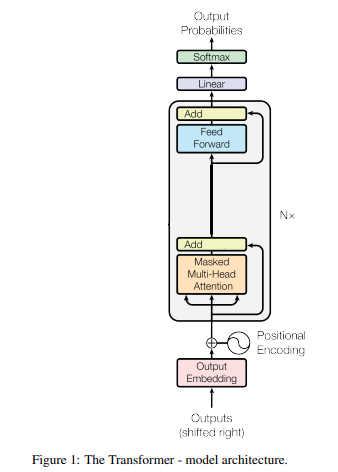

### Step 7.2 Norm Layer

In [ ]:
class LayerNorm:
    def __init__(self, dim, eps=1e-5):
        self.eps = eps
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        x_mean = x.mean(dim=1, keepdim=True) # layer mean
        x_variance = x.var(dim=1, keepdim=True) # layer variance
        x_hat = (x - x_mean) / torch.sqrt(x_variance + self.eps) # normalize to the unit variance
        self.out = self.gamma * x_hat + self.beta
        return self.out

    def parameters(self):
        return [self.gamma, self.beta]

In [ ]:
class Block(nn.Module):
    """Transformer Block: Communication folled by computation."""
    def __init__(self):
        super().__init__()

        self.multi_self_attention_heads_layer = MultiHeadAttention()
        self.feed_forward_network = FeedForwardNetwork(EMBEDDING_DIM)
        self.layer_norm1 = nn.LayerNorm(EMBEDDING_DIM) #NEW
        self.layer_norm2 = nn.LayerNorm(EMBEDDING_DIM) #NEW
    def forward(self, x):
        x = x + self.multi_self_attention_heads_layer(self.layer_norm1(x)) #UPDATED
        x = x + self.feed_forward_network(self.layer_norm2(x)) #UPDATED
        return x

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)


        self.blocks = nn.Sequential(
            Block(),
            Block(),
            Block(),
            nn.LayerNorm(EMBEDDING_DIM)
        )

        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding
        x = self.blocks(x)
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.3642) Validation Loss: tensor(4.3717)
Step: 250 Training Loss: tensor(2.5716) Validation Loss: tensor(2.5707)
Step: 500 Training Loss: tensor(2.3912) Validation Loss: tensor(2.3923)
Step: 750 Training Loss: tensor(2.3127) Validation Loss: tensor(2.3159)
Step: 1000 Training Loss: tensor(2.2479) Validation Loss: tensor(2.2609)
Step: 1250 Training Loss: tensor(2.1945) Validation Loss: tensor(2.2196)
Step: 1500 Training Loss: tensor(2.1632) Validation Loss: tensor(2.1814)
Step: 1750 Training Loss: tensor(2.1334) Validation Loss: tensor(2.1631)
Step: 1999 Training Loss: tensor(2.1090) Validation Loss: tensor(2.1497)
xess, of you? wall.

ENCERUF MIUS:
Wave Fil thell to that shamt, is not me endebscith or chy he Vow Cyor forer a mothaid my friend. I:

Oly Tiventt! clato, I jusuting the'm, not porpo,
Iill he furer we


Slight improvement in score from 2.13 to 2.03, we see more and more overfitting (increasing difference between training and validation collection). According to the scheme from original paper, we have built part of Transformer that is on the draw. A very important note: here is the only significant change from the original architecture: the normalizing layers are **in front of** and **not behind** the corresponding blocks

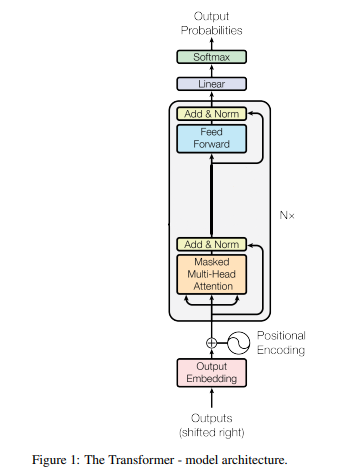

### Step 8: Dropout and a little tidying up

In [ ]:
# adding dropout
class FeedForwardNetwork(nn.Module):
    """A simple linear network followed by a non-linearity"""
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(in_features=EMBEDDING_DIM, out_features=EMBEDDING_DIM*4),
            nn.ReLU(),
            nn.Linear(4*EMBEDDING_DIM, EMBEDDING_DIM),
            nn.Dropout(DROPOUT) #NEW
        )
    def forward(self, x):
        return self.ffn(x)

In [ ]:
#adding dropout
class Head(nn.Module):
    """ single head of self attention """
    def __init__(self):
        super().__init__()
        self.key_layer   = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.query_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.value_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)

        self.register_buffer('tril', torch.tril(torch.ones((CONTEXT_LEN, CONTEXT_LEN))))
        self.dropout = nn.Dropout(DROPOUT)

    def forward(self, x):
        B,T,C = x.shape
        q = self.query_layer(x)
        k = self.key_layer(x) #(B,T,C)
        v = self.value_layer(x) #(B,T,C)

        #compute scores based on affinities
        weights = (q @ k.transpose(-2,-1)) * HEAD_SIZE**-0.5 # (B,T,C) @ (B,C,T) -> (B,T,T)
        weights = weights.masked_fill(self.tril[:T,:T] == 0, float('-inf')) #(B,T,T)
        weights = F.softmax(input=weights, dim=-1) #(B,T,T)
        weights = self.dropout(weights)


        out = weights @ v # (B,T,T) @ (B,T,C) -> (B,T,C)
        return out



In [ ]:
#adding dropout
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head() for _ in range(NUM_HEADS)])
        self.projections = nn.Linear(EMBEDDING_DIM, EMBEDDING_DIM)
        self.dropout = nn.Dropout(DROPOUT) #NEW

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        return self.projections(out)

In [ ]:
class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.blocks = nn.Sequential(*(Block() for _ in range(N_LAYER))) #UPDATED
        self.layer_norm = nn.LayerNorm(EMBEDDING_DIM)
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx) #(B,T,C) Batch, Time, Channel - Lookup token embeddings #NEW
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding #the x does not contain only information about the value of the token, but also about its position which is in line with the assumptions of the transformer architecture
        x = self.blocks(x) #UPDATED
        logits = self.language_model_head_linear_layer(x) #(B,T,C) Where C is now token logits of size vocab_size #UPDATE

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            #crop idx to the max size of our positional embeddings table, (the only change from the generate function in the bigram model, with it we can generate a model response of any length)
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
best_val_loss = 10 #NEW
for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.6103) Validation Loss: tensor(4.6068)
Step: 250 Training Loss: tensor(2.5317) Validation Loss: tensor(2.5271)
Step: 500 Training Loss: tensor(2.3913) Validation Loss: tensor(2.3946)
Step: 750 Training Loss: tensor(2.3262) Validation Loss: tensor(2.3377)
Step: 1000 Training Loss: tensor(2.2724) Validation Loss: tensor(2.2786)
Step: 1250 Training Loss: tensor(2.2247) Validation Loss: tensor(2.2427)
Step: 1500 Training Loss: tensor(2.1920) Validation Loss: tensor(2.2063)
Step: 1750 Training Loss: tensor(2.1673) Validation Loss: tensor(2.2050)
Step: 1999 Training Loss: tensor(2.1505) Validation Loss: tensor(2.1755)
xl coune.

FUbarey nit, thent eash'se foll ther muCis an seast,-dor me.

Eurse,
Cour bupint: Harrilf.

AKFill sexe marrie now laive.

HI:
Youth
Whith cht not, del hebyson so namem sus abe conaders his 


## Ultimate Version, Whole Workflow

If you want just to train prepared transformer: run these cells

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import time

In [ ]:
#downloading the file
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

with open('input.txt') as f:
    text = f.read()

#tokenisation
tokens = set(list(text))

char_to_token = {char:idx for idx,char in enumerate(tokens)}
token_to_char = {idx:char for char,idx in char_to_token.items()}
encode = lambda x: [char_to_token[char] for char in x]
decode = lambda idxs: ''.join([token_to_char[idx] for idx in idxs])

encoded_text = torch.tensor(encode(text))

# train test split
train_test_split = 0.9
train_data = encoded_text[:int(train_test_split*len(encoded_text))]
valid_data = encoded_text[int(train_test_split*len(encoded_text)):]
print('Train data length:',len(train_data),'Valid data length:',len(valid_data))


--2024-01-30 10:22:41--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2024-01-30 10:22:42 (34.6 MB/s) - ‘input.txt’ saved [1115394/1115394]

Train data length: 1003854 Valid data length: 111540


In [ ]:
#whole transformer architecture

class Head(nn.Module):
    """ single head of self attention """
    def __init__(self):
        super().__init__()
        self.key_layer   = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.query_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.value_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)

        self.register_buffer('tril', torch.tril(torch.ones((CONTEXT_LEN, CONTEXT_LEN))))
        self.dropout = nn.Dropout(DROPOUT)
    def forward(self, x):
        B,T,C = x.shape
        q = self.query_layer(x) #(B,T,C)
        k = self.key_layer(x) #(B,T,C)
        v = self.value_layer(x) #(B,T,C)

        #compute scores based on affinities
        weights = (q @ k.transpose(-2,-1)) * HEAD_SIZE**-0.5
        weights = weights.masked_fill(self.tril[:T,:T] == 0, float('-inf'))
        weights = F.softmax(input=weights, dim=-1)
        weights = self.dropout(weights)


        out = weights @ v
        return out


class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head() for _ in range(NUM_HEADS)])
        self.projections = nn.Linear(EMBEDDING_DIM, EMBEDDING_DIM)
        self.dropout = nn.Dropout(DROPOUT)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        return self.projections(out)

class Block(nn.Module):
    """Transformer Block: Communication folled by computation."""
    def __init__(self):
        super().__init__()

        self.multi_self_attention_heads_layer = MultiHeadAttention()
        self.feed_forward_network = FeedForwardNetwork(EMBEDDING_DIM)
        self.layer_norm1 = nn.LayerNorm(EMBEDDING_DIM)
        self.layer_norm2 = nn.LayerNorm(EMBEDDING_DIM)
    def forward(self, x):
        x = x + self.multi_self_attention_heads_layer(self.layer_norm1(x))
        x = x + self.feed_forward_network(self.layer_norm2(x))
        return x

class FeedForwardNetwork(nn.Module):
    """A simple linear network followed by a non-linearity"""
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(in_features=EMBEDDING_DIM, out_features=EMBEDDING_DIM*4),
            nn.ReLU(),
            nn.Linear(4*EMBEDDING_DIM, EMBEDDING_DIM),
            nn.Dropout(DROPOUT)
        )
    def forward(self, x):
        return self.ffn(x)


class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.blocks = nn.Sequential(*(Block() for _ in range(N_LAYER)))
        self.layer_norm = nn.LayerNorm(EMBEDDING_DIM)
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.shape
        token_embeddings = self.token_embedding_table(idx)
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding #the x does not contain only information about the value of the token, but also about its position which is in line with the assumptions of the transformer architecture
        x = self.blocks(x)
        logits = self.language_model_head_linear_layer(x)

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx



In [ ]:
def get_batch(split, batch_size, context_length):
    data = train_data if split == 'train' else valid_data

    idxs = torch.randint(low=0, high=len(data)-CONTEXT_LEN, size=(BATCH_SIZE,))
    x = torch.stack([data[idx:idx+CONTEXT_LEN] for idx in idxs])
    y = torch.stack([data[idx+1:idx+CONTEXT_LEN+1] for idx in idxs])
    x,y = x.to(DEVICE), y.to(DEVICE)
    return x,y

@torch.no_grad()
def estimate_loss():
    out = {}
    #turn on evaluation mode
    model.eval()
    for split in ['train','valid']:
        losses = torch.zeros(EVAL_ITERS)
        for k in range(EVAL_ITERS):
            x_batch, y_batch = get_batch(split, BATCH_SIZE, CONTEXT_LEN)
            logits, loss = model(x_batch, y_batch)
            losses[k] = loss.item()
        out[split] = losses.mean()
    #turn back to training mode
    model.train()
    return out

In [ ]:
#hyperparameter board

BATCH_SIZE = 32 #number of token chunks per batch
CONTEXT_LEN = 128 #length of the token chunks
LEARNING_RATE = 3e-4
MAX_ITERS = 3000 #number of training iterations or steps
EVAL_INTERVAL = 300 #number of steps between evaluating the validation set to see how our validation loss is doing.
EVAL_ITERS = 200 #number of steps to do on the validation set per each interval. We do more than 1 to get a more accurate overall valid loss
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' #instead of using the cpu, we'll use the GPU if it's availble.
EMBEDDING_DIM = 384 #The vector size of the token embeddings
VOCAB_SIZE = len(tokens)
TORCH_SEED = 42
BLOCK_SIZE = 4
NUM_HEADS = 6
HEAD_SIZE = int(EMBEDDING_DIM/NUM_HEADS)

DROPOUT = 0.2
N_LAYER = 6

model = TransformerLanguageModel()

In [ ]:
#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
best_val_loss = 10

for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

    xb,yb = get_batch('train',BATCH_SIZE,CONTEXT_LEN)
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print()
print(decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(4.5027) Validation Loss: tensor(4.4973)
Step: 200 Training Loss: tensor(2.3938) Validation Loss: tensor(2.4217)
Step: 400 Training Loss: tensor(2.0358) Validation Loss: tensor(2.1059)
Step: 600 Training Loss: tensor(1.8262) Validation Loss: tensor(1.9612)
Step: 800 Training Loss: tensor(1.7030) Validation Loss: tensor(1.8537)
Step: 1000 Training Loss: tensor(1.6224) Validation Loss: tensor(1.7837)
Step: 1200 Training Loss: tensor(1.5600) Validation Loss: tensor(1.7369)
Step: 1400 Training Loss: tensor(1.5146) Validation Loss: tensor(1.6985)
Step: 1600 Training Loss: tensor(1.4798) Validation Loss: tensor(1.6762)
Step: 1800 Training Loss: tensor(1.4446) Validation Loss: tensor(1.6532)
Step: 2000 Training Loss: tensor(1.4132) Validation Loss: tensor(1.6315)
Step: 2200 Training Loss: tensor(1.3892) Validation Loss: tensor(1.6117)
Step: 2400 Training Loss: tensor(1.3716) Validation Loss: tensor(1.5913)
Step: 2600 Training Loss: tensor(1.3534) Validation Loss: 

I tried several different models. Their performance is summarized in the table.



\begin{array}{|c|c|c|c|}
\hline
no & batch \ size & context \ lenght & loss \ value & training \ time\\
\hline
1 & 64 & 256 & 1.50 & 36 \ min \ on \ T4 \ GPU\\
\hline
2 & 64 & 128 & 1.57 & 12 \ min \ on \ T4 \ GPU\\
\hline
3 & 32 & 256 & 1.60 & 14 \ min \ on \ T4 \ GPU\\
\hline
4 & 32 & 128 & 1.62 & 6 \ min \ on \ T4 \ GPU\\
\hline
\end{array}

Important additional information:

- models 1 and 2 were prone to very large overfitting (large difference in the value of the loss function between the training set and the validation set plus reaching a plateau from a certain point in training). The reason for this condition was probably that the hyperparameters were too large for such a small dataset.

- as can be seen, under the given conditions, the difference between the different trainings (based on the value of the loss function) is insignificant while the training time differs by a factor of six between the fastest and slowest training. Moreover, extending the training process from 2,000 to 3,000 (training time ~9 min) steps for the 4 model brought the loss function to a value of 1.56, which is already a very competitive performance compared to larger models trained for this project

- of course, it is possible to save the weights determined during the training of the model, but in a situation where training takes 6 minutes I decided that it was not necessary

- you can see that the architecture presented in the publication differs significantly from the one we implemented. This is due to the fact that *Attention is All You Need* designed the Decoder-Encoder architecture, while we only implemented the Encoder part. This is due to the difference in the goals we wanted to achieve (generating text based on trained text) compared to the authors of the paper (translation model, with a specific context given)



**Comparison to commercial available LLM**


In [ ]:
#print the number of parameters

print(sum(p.numel() for p in model.parameters()))

10739777


So our model has about 10 million parameters, by comparison, the largest model in the GPT-3 family has 175 BILLIONS parameters whereas GPT-4 has 1.7 TRILLION parameters.

The fact that such an extremely small model, learned on a set of tokens that are representations of individual characters in a text after only 6 minutes of training can generate a text that not only looks like an existing language but also often resembles English is astounding

## (Update 30.01) Changing the tokenisation method

I'm still experimenting with this architecture and finally managed to train a model based on a different tokenization

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import time

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

!pip -q install tiktoken

--2024-01-30 12:12:56--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-01-30 12:12:56 (20.6 MB/s) - ‘input.txt’ saved [1115394/1115394]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:
with open('input.txt') as f:
    text = f.read()

#tokenisation
tokens = set(list(text))
print(len(tokens))
char_to_token = {char:idx for idx,char in enumerate(tokens)}
token_to_char = {idx:char for char,idx in char_to_token.items()}

encode = lambda x: [char_to_token[char] for char in x]
decode = lambda idxs: ''.join([token_to_char[idx] for idx in idxs])
encoded_text = torch.tensor(encode(text))

#tiktoken
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")
encoded_text = torch.tensor(enc.encode(text))
tokens = set(list(encoded_text))
print(len(tokens))
# train test split
train_test_split = 0.9
train_data = encoded_text[:int(train_test_split*len(encoded_text))]
valid_data = encoded_text[int(train_test_split*len(encoded_text)):]
print('Train data length:',len(train_data),'Valid data length:',len(valid_data))

print("Hello world (old tokenisation)",encode('Hello world'))
print('Hello world (new tokenisation)', enc.encode("Hello world"))

65
301829
Train data length: 271646 Valid data length: 30183
Hello world (old tokenisation) [52, 21, 62, 62, 29, 0, 11, 29, 1, 62, 19]
Hello world (new tokenisation) [9906, 1917]


As you can see the obtained tokens are more diverse this leads to greater data compression, however, this involves managing a larger dictionary (VOCAB_SIZE increases from 65 to over 300,000)

In [ ]:
#on google colab in the free version, we are forced to heavily truncate the hyperparameters of the model to fit within the limitations of available computing resources

BATCH_SIZE = 8 #before 32
CONTEXT_LEN = 64 #before 128
LEARNING_RATE = 3e-4
MAX_ITERS = 3000
EVAL_INTERVAL = 500
EVAL_ITERS = 200
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDING_DIM = 384
VOCAB_SIZE = len(tokens) #now ~300,000 before 65
TORCH_SEED = 42
BLOCK_SIZE = 4
NUM_HEADS = 6
HEAD_SIZE = int(EMBEDDING_DIM/NUM_HEADS)

DROPOUT = 0.2
N_LAYER = 6

class Head(nn.Module):
    """ single head of self attention """
    def __init__(self):
        super().__init__()
        self.key_layer   = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.query_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)
        self.value_layer = nn.Linear(in_features=EMBEDDING_DIM, out_features=HEAD_SIZE, bias=False)

        self.register_buffer('tril', torch.tril(torch.ones((CONTEXT_LEN, CONTEXT_LEN))))
        self.dropout = nn.Dropout(DROPOUT)
    def forward(self, x):
        B,T,C = x.shape
        q = self.query_layer(x) #(B,T,C)
        k = self.key_layer(x) #(B,T,C)
        v = self.value_layer(x) #(B,T,C)

        #compute scores based on affinities
        weights = (q @ k.transpose(-2,-1)) * HEAD_SIZE**-0.5
        weights = weights.masked_fill(self.tril[:T,:T] == 0, float('-inf'))
        weights = F.softmax(input=weights, dim=-1)
        weights = self.dropout(weights)


        out = weights @ v
        return out


class MultiHeadAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.heads = nn.ModuleList([Head() for _ in range(NUM_HEADS)])
        self.projections = nn.Linear(EMBEDDING_DIM, EMBEDDING_DIM)
        self.dropout = nn.Dropout(DROPOUT)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        return self.projections(out)

class Block(nn.Module):
    """Transformer Block: Communication folled by computation."""
    def __init__(self):
        super().__init__()

        self.multi_self_attention_heads_layer = MultiHeadAttention()
        self.feed_forward_network = FeedForwardNetwork(EMBEDDING_DIM)
        self.layer_norm1 = nn.LayerNorm(EMBEDDING_DIM)
        self.layer_norm2 = nn.LayerNorm(EMBEDDING_DIM)
    def forward(self, x):
        x = x + self.multi_self_attention_heads_layer(self.layer_norm1(x))
        x = x + self.feed_forward_network(self.layer_norm2(x))
        return x

class FeedForwardNetwork(nn.Module):
    """A simple linear network followed by a non-linearity"""
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        self.ffn = nn.Sequential(
            nn.Linear(in_features=EMBEDDING_DIM, out_features=EMBEDDING_DIM*4),
            nn.ReLU(),
            nn.Linear(4*EMBEDDING_DIM, EMBEDDING_DIM),
            nn.Dropout(DROPOUT)
        )
    def forward(self, x):
        return self.ffn(x)


class TransformerLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(num_embeddings=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM)
        self.position_embedding_table = nn.Embedding(CONTEXT_LEN, EMBEDDING_DIM)

        self.blocks = nn.Sequential(*(Block() for _ in range(N_LAYER)))
        self.layer_norm = nn.LayerNorm(EMBEDDING_DIM)
        self.language_model_head_linear_layer = nn.Linear(EMBEDDING_DIM, VOCAB_SIZE)

    def forward(self, idx, targets=None):

        B, T = idx.size()
        token_embeddings = self.token_embedding_table(idx) #(B,T,C) Batch, Time, Channel - Lookup token embeddings #NEW
        pos_embedding = self.position_embedding_table(torch.arange(T, device=DEVICE))
        x = token_embeddings + pos_embedding #the x does not contain only information about the value of the token, but also about its position which is in line with the assumptions of the transformer architecture
        x = self.blocks(x)
        logits = self.language_model_head_linear_layer(x) #(B,T,C) Where C is now token logits of size vocab_size #UPDATE

        if targets is not None:
            B,T,C = logits.shape
            logits_reshaped = logits.view(B*T,C)
            targets_reshaped = targets.view(B*T)
            loss = F.cross_entropy(input=logits_reshaped, target=targets_reshaped)
        else:
            loss=None
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_crop = idx[:,-CONTEXT_LEN:]
            logits, loss = self(idx_crop)
            logits_last_timestep = logits[:,-1,:]
            probs = F.softmax(input=logits_last_timestep, dim=-1)
            idx_next = torch.multinomial(input=probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

def get_batch(split, batch_size=BATCH_SIZE, context_length=CONTEXT_LEN):
    data = train_data if split == 'train' else valid_data

    idxs = torch.randint(low=0, high=len(data)-CONTEXT_LEN, size=(BATCH_SIZE,))
    x = torch.stack([data[idx:idx+CONTEXT_LEN] for idx in idxs])
    y = torch.stack([data[idx+1:idx+CONTEXT_LEN+1] for idx in idxs])
    x,y = x.to(DEVICE), y.to(DEVICE)
    return x,y

@torch.no_grad()
def estimate_loss():
    out = {}
    #turn on evaluation mode
    model.eval()
    for split in ['train','valid']:
        losses = torch.zeros(EVAL_ITERS)
        for k in range(EVAL_ITERS):
            x_batch, y_batch = get_batch(split)
            logits, loss = model(x_batch, y_batch)
            losses[k] = loss.item()
        out[split] = losses.mean()
    #turn back to training mode
    model.train()
    return out

model = TransformerLanguageModel()

#conventional training loop
model = TransformerLanguageModel()
model = model.to(DEVICE)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
best_val_loss = 10

for step in range(MAX_ITERS):

    if step % EVAL_ITERS == 0 or step == MAX_ITERS-1:
        losses = estimate_loss()
        print('Step:',step,'Training Loss:',losses['train'],'Validation Loss:',losses['valid'])

        #saving model
        if losses['valid'] < best_val_loss:
          best_val_loss = losses['valid']
    xb,yb = get_batch('train')
    logits, loss = model(xb,yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

context = torch.zeros((1,1), dtype=torch.long, device=DEVICE)
print(enc.decode(model.generate(context,max_new_tokens=200)[0].tolist()))

Step: 0 Training Loss: tensor(13.0549) Validation Loss: tensor(13.0582)
Step: 200 Training Loss: tensor(6.0035) Validation Loss: tensor(6.6651)
Step: 400 Training Loss: tensor(5.4055) Validation Loss: tensor(6.2192)
Step: 600 Training Loss: tensor(5.1221) Validation Loss: tensor(6.0690)
Step: 800 Training Loss: tensor(4.8879) Validation Loss: tensor(5.8738)
Step: 1000 Training Loss: tensor(4.7284) Validation Loss: tensor(5.8251)
Step: 1200 Training Loss: tensor(4.5894) Validation Loss: tensor(5.7368)
Step: 1400 Training Loss: tensor(4.4432) Validation Loss: tensor(5.6800)
Step: 1600 Training Loss: tensor(4.3217) Validation Loss: tensor(5.7255)
Step: 1800 Training Loss: tensor(4.1883) Validation Loss: tensor(5.7388)
Step: 2000 Training Loss: tensor(4.1268) Validation Loss: tensor(5.7275)
Step: 2200 Training Loss: tensor(3.9988) Validation Loss: tensor(5.6877)
Step: 2400 Training Loss: tensor(3.8871) Validation Loss: tensor(5.7562)
Step: 2600 Training Loss: tensor(3.7966) Validation Loss

The change in the tokenization method, makes the text generated by the model much more English-like than before. And it's actually quite an expected effect: when you glue together text from sub-words, you're much more likely to get the actual word than when you glue together single letters. Probably if I had the opportunity to train the model with a longer context length the results would be even better.